# 単線形回帰

### ライブラリのインポート

In [1]:
import numpy as np

# matplotlib と mpl_toolkits は必須ではないですが、グラフを書く際に必要となります。  
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### 訓練させるためのランダムな入力データの作成

In [2]:
# まずは作成したいデータの数を入れた変数を作成します
observations = 1000

# 入力の変数は2つです
# 今回はそれをxとzとします
# その値は一様分布を使ってランダムに決めていきます。uniformメソッドの引数は3つです(low, high, size).
# xs と zs のサイズは1000 x 1です
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# 2つの変数を一つの行列にします 
# column_stackは Numpy のメソッドであり、2つのベクトルを組み合わせて行列にします
inputs = np.column_stack((xs,zs))

# 行列のサイズは n x kとなり、 n はデータの数を示しており、 k は変数の数を示しています。つまり、今回は1000 x 2となります。
print (inputs.shape)

(1000, 2)


### ターゲットの作成

In [10]:
# ターゲットとする値にはランダムなノイズを加えます f(x,z) = 2x - 3z + 5 + <ノイズ>
noise = np.random.uniform(-1, 1, (observations,1))

# f(x,z) = 2x - 3z + 5 + noise の式を使ってターゲットを作成します
# ここでは、重みはそれぞれ2と-3となり、バイアスは5です
targets = 10*xs - 2*zs + 8 + noise

# 念の為、ターゲットのサイズを確認しておきましょう。今回の場合はn x mであり、mは出力の数ということから1000 x 1となります
print (targets.shape)

(1000, 1)


### 訓練データのプロット

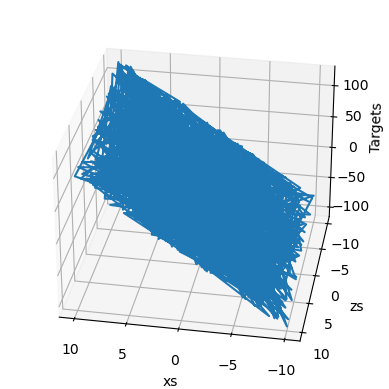

In [12]:
# 3D plotを使うためにはオブジェクトはある形状でなければいけないことから、reshapeメソッドを使っていきます
targets = targets.reshape(observations,1)

# matplotlib.pyplotを使って散布図を作成していきます

# 変数を宣言します
fig = plt.figure()

# 3dのグラフを作成するためのメソッドを書いていきます
ax = fig.add_subplot(111, projection='3d')

# 軸を選びます
ax.plot(xs, zs, targets)

# ラベルに名前を付けます
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# azimの値を変えることで、グラフをどこから見るのかという点を変更することができます
ax.view_init(azim=100)

# 実際に散布図を表示していきます 
plt.show()

# ターゲットの形状を元に戻していきます
targets = targets.reshape(observations,1)

### 変数の初期化

In [5]:
# 重みとバイアスを、ある範囲でランダムに決めていきます
# その範囲を決める変数としてinit_rangeを定義します
init_range = 0.1

# 重みのサイズは k x mであり k は入力の数、 m は出力の数です
# 今回の場合においては、重みの行列は2x1となります。
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

# バイアスのサイズは1であり、スカラーとなります
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

#初期化の結果を確認してみましょう
print (weights)
print (biases)

[[-0.04744068]
 [ 0.05798067]]
[0.04704975]


### 学習率の設定

In [6]:
# 今回の例では、学習率が0.02だと非常に良く機能します。
learning_rate = 0.02

### モデルの訓練

In [7]:
# 今回は繰り返しの回数は100回とします
for i in range (100):
    
    # y = xw + b の線形モデルの等式です
    outputs = np.dot(inputs,weights) + biases
    # デルタは出力とターゲットの差を示しています
    # ここではデルタは1000x1のベクトルです
    deltas = outputs - targets
        
    # L2ノルム損失を使って損失の計算をしていきます。値を2で割っていますが、これは最小値を見つけるという意味では影響はありません。
    # また、コードを一般化させるためにデータの数で割っています。
    loss = np.sum(deltas ** 2) / 2 / observations
    
    # それぞれの繰り返しにおける損失関数の値を出力します.
    print (loss)
    
    # 損失関数の場合と同じように、デルタに関してもデータの数で割っていきます
    deltas_scaled = deltas / observations
    
    # 勾配降下法のアルゴリズムを適用していきます
    # 重みは2x1, 学習率は1x1 (scalar), 入力は1000x2, デルタは1000x1となります
    # 演算を適切に行うために、入力の転置を取ります
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

236771.06346058508
4827614.956325935
1662174262.5470035
599968958873.6525
216590393518097.72
7.818973845250378e+16
2.8226714519750963e+19
1.018992297903351e+22
3.6785907281550747e+24
1.327981553257232e+27
4.79405059196666e+29
1.73066568748369e+32
6.24775159205126e+34
2.255455819011081e+37
8.142258661472737e+39
2.939378175866726e+42
1.0611237520178266e+45
3.830686457227898e+47
1.382888537334586e+50
4.992266341932096e+52
1.8022221282435913e+55
6.506072346840828e+57
2.34871033481205e+60
8.478910074726673e+62
3.0609102787064017e+65
1.104997181444045e+68
3.9890707659530234e+70
1.4400657162750276e+73
5.19867755892082e+75
1.8767371555469632e+78
6.77507368189547e+80
2.445820569995319e+83
8.829480742914409e+85
3.1874672715523725e+88
1.1506846102326896e+91
4.154003663170169e+93
1.4996069539977382e+96
5.4136230943093624e+98
1.9543330956895417e+101
7.055197198568055e+103
2.546945943885801e+106
9.194546174262762e+108
3.319256914485991e+111
1.1982610403548795e+114
4.325755908095189e+116
1.5616099953

### 重みとバイアスの出力

In [8]:
# 重みとバイアスの値が適切かどうか確認しましょう。（重みは2と-3、バイアスは5でした。）
print (weights, biases)

[[-2.32222430e+124 -2.32222430e+124 -2.32222430e+124 ... -2.32222430e+124
  -2.32222430e+124 -2.32222430e+124]
 [-2.78600529e+123 -2.78600529e+123 -2.78600529e+123 ... -2.78600529e+123
  -2.78600529e+123 -2.78600529e+123]] [-3.79175572e+128]


### 出力とターゲットの図示
出力とターゲットを散布図に示し、もしその直線が45度に近ければ、正しい（出力とターゲットの値が同じに近い）ということができます。

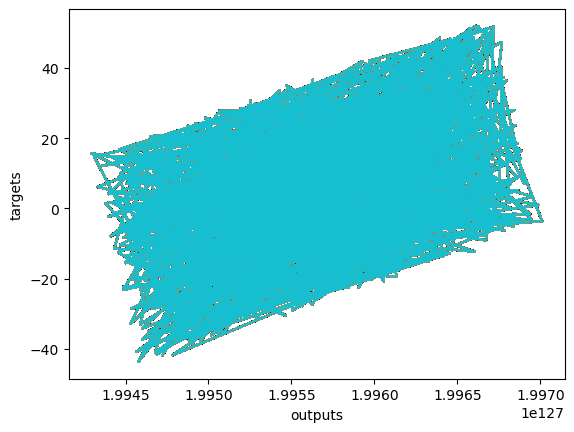

In [9]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()